# Summary
## Logistic Regression
    With imbalanced data set: 
    Training Data Score: 0.9184328235872696
    Testing Data Score: 0.9196993115076577
    
    Balanced data set - oversampling:
    Training Data Score: 0.7621371659877539
    Testing Data Score: 0.7653523941280455
    
    Balanced and scaled data set:
    Training Data Score: 0.7874234621986524
    Testing Data Score: 0.7897548228422104
    
    Scaled data set with feature selection:
    Training Score: 0.7771372940844926
    Testing Score: 0.7766505264775959
    
## Linear Regression
    With imbalanced data set:
    Training Score: 0.2191701004944563
    Testing Score: 0.21709164708500517
    
    Balanced data set - oversampling:
    Training Score: 0.388831133678463
    Testing Score: 0.39622325145411474
    
    Balanced and scaled data set:
    Training Score: 0.389331570456394
    Testing Score: 0.394187701105674
    
## AdaBoost Classifier
    Balanced and scaled data set:
    Training Score: 0.8103527784182615
    Testing Score: 0.808085466144032
    
## KNN 
    Balanced and scaled data set:
    k: 3
    Training Score: 0.974
    Testing Score: 0.951

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

survival_df = pd.read_csv("../Patient-Survival-Model/Resources/cleaned_data_survival_prediction.csv")

In [ ]:
survival_df.columns

In [ ]:
survival_df['hospital_death'].value_counts()

In [ ]:
percent_survived = 52044/56935 * 100
percent_survived

In [25]:
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [26]:
X = pd.get_dummies(X)

### Logistic Regression with imbalanced data set 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)
confusion_matrix(y, classifier.predict(X))
print(classification_report(y_true, y_pred))

### Balance the Data Set - OVERSAMPLING

In [4]:
#Balance Data - oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))


Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


### Logistic Regression - balanced data set & scaled.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

In [ ]:
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)
confusion_matrix(y_ros, classifier.predict(x_ros))
print(classification_report(y_true, y_pred))

### Logistic Regression - balanced data set only.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)
confusion_matrix(y_ros, classifier.predict(x_ros))
print(classification_report(y_true, y_pred))

### Linear Regression with imbalanced data set

In [ ]:
#Linear Regression Model WITHOUT balancing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

### Linear Regression - balanced data set & scaled.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

lrm.fit(X_train_scaled, y_train)
training_score = lrm.score(X_train_scaled, y_train)
testing_score = lrm.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3893357017292717
Testing Score: 0.3944265648588078


### Linear Regression - balanced data set only.

In [ ]:
#Linear Regression Model WITH balancing the data by Oversampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


### Logistic Regression with feature selection

In [ ]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

In [ ]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(x_ros), y_ros, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)


In [ ]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')


### AdaBoostClassifier - balanced and scaled data set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

### RandomForestClassifier - balanced and scaled data set.

In [ ]:
# Random Forest Classifier - Model is overfitting
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
# Random Forest Classifier w/feature selection - Model is overfitting
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

In [ ]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

### ExtraTreesClassifier - balanced and scaled data set.

In [ ]:
# ExtraTrees Classifier - Model is overfitting
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

### KNN - balanced and scaled data set.

k: 1, Train/Test Score: 1.000/0.974
k: 3, Train/Test Score: 0.974/0.951
k: 5, Train/Test Score: 0.952/0.930
k: 7, Train/Test Score: 0.932/0.911
k: 9, Train/Test Score: 0.914/0.891


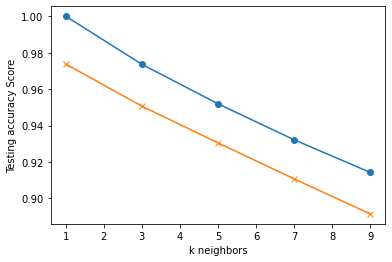

In [6]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

y_true = y_test
y_pred = knn.predict(X_test_scaled)

confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred))


k=3 Test Acc: 0.951
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     12967
           1       0.91      1.00      0.95     13055

    accuracy                           0.95     26022
   macro avg       0.95      0.95      0.95     26022
weighted avg       0.95      0.95      0.95     26022

